<a href="https://colab.research.google.com/github/Favourwendee/Web-Scraping/blob/main/British_Airways.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import requests
from bs4 import BeautifulSoup
import csv

In [ ]:
# This code scrapes review data from the British Airways page on Skytrax
#The pagesize was set to 100 inorder to extract 100 data instead of the default which is only 10
url = "https://www.airlinequality.com/airline-reviews/british-airways/?sortby=post_date%3ADesc&pagesize=100"
response = requests.get(url)

soup = BeautifulSoup(response.content, "html.parser")
reviews = soup.find_all("article", class_="comp_media-review-rated")



In [ ]:
# and saves the reviews to a CSV file named "reviews.csv".
with open("data/reviews.csv", mode="w", newline="", encoding="utf-8") as file:
    writer = csv.writer(file)
    writer.writerow(["review"])

    for review in reviews:
        text = review.find("div", class_="text_content").text.strip()
        writer.writerow([text])

>This code reads the scraped reviews from the "reviews.csv" file and uses the VADER sentiment analyzer from the NLTK library to compute a sentiment score for each review. Reviews with a score greater than 0.5 are considered positive, and reviews with a score less than -0.5 are considered negative. The code then prints the number of positive and negative reviews.

In [ ]:
# To analyze the data, Python libraries pandas and nltk is used to perform sentiment analysis on the scraped reviews:

import pandas as pd
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer

nltk.download("vader_lexicon")
sia = SentimentIntensityAnalyzer()

reviews_df = pd.read_csv("data/reviews.csv")
reviews_df["sentiment"] = reviews_df["review"].apply(lambda x: sia.polarity_scores(x)["compound"])
positive_reviews = reviews_df[reviews_df["sentiment"] > 0.5]
negative_reviews = reviews_df[reviews_df["sentiment"] < -0.5]

print("Number of positive reviews:", len(positive_reviews))
print("Number of negative reviews:", len(negative_reviews))


[nltk_data] Downloading package vader_lexicon to C:\Users\Olaniyan
[nltk_data]     Daniel\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


Number of positive reviews: 26
Number of negative reviews: 51


>To present insights, word clouds is used.

> This code reads the scraped reviews from the "reviews.csv" file and joins all the reviews into a single string. It then creates a word cloud using the WordCloud library, which takes in the text and generates a visualization where the size of each word is proportional to its frequency in the text.

> This code displays the word cloud as a matplotlib plot, which can be saved or include in the PowerPoint presentation.

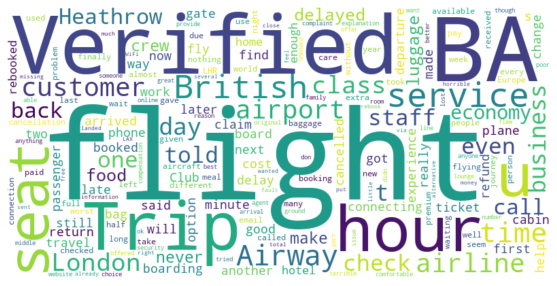

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

reviews_df = pd.read_csv("data/reviews.csv")
all_text = " ".join(review for review in reviews_df["review"])

wordcloud = WordCloud(width=800, height=400, background_color="white", max_words=200, collocations=False).generate(all_text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()


> Topic modeling on the scraped reviews using Latent Dirichlet Allocation (LDA) algorithm:

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

reviews_df = pd.read_csv("data/reviews.csv")

# Vectorize the text data using CountVectorizer
vectorizer = CountVectorizer(stop_words="english")
X = vectorizer.fit_transform(reviews_df["review"])

# Fit LDA model to the vectorized data
n_topics = 5
lda = LatentDirichletAllocation(n_components=n_topics, random_state=42)
lda.fit(X)

# Print the most important words for each topic
feature_names = vectorizer.get_feature_names()
for topic_idx, topic in enumerate(lda.components_):
    print(f"Topic {topic_idx}:")
    print(", ".join([feature_names[i] for i in topic.argsort()[:-11:-1]]))
    print()


Topic 0:
flight, ba, verified, class, trip, business, crew, seat, airport, service

Topic 1:
flight, verified, trip, service, did, hours, plane, food, fly, help

Topic 2:
flight, british, verified, airways, trip, ba, flights, service, airport, london

Topic 3:
flight, trip, verified, check, british, airways, service, hours, airport, club

Topic 4:
ba, flight, seats, economy, business, london, trip, verified, class, heathrow



> This code reads the scraped reviews from the "reviews.csv" file and vectorizes the text data using the CountVectorizer from scikit-learn. The vectorized data is then fitted to an LDA model with 5 topics using the LatentDirichletAllocation function.

> The code then prints the most important words for each topic, which are the words that are most strongly associated with that topic based on their frequency in the reviews. You can adjust the number of topics (n_topics) to explore different aspects of the review data.

> Once you have identified the most important words for each topic, you can analyze the topics to gain insights into what customers are saying about the airline. For example, if one of the topics is related to "food" and includes words such as "meal", "menu", and "quality", you could infer that customers have strong opinions about the food served on the airline.